In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install tensorflow scikit-learn matplotlib pandas

In [19]:
# Step 3: Import Packages and Define Data Paths
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Data folder paths
data_dir = '/content/drive/My Drive/data'
streamflow_file = f'{data_dir}/streamflow_timeseries/streamflow_observed.csv'

# List of catchment IDs
catchment_ids = ['10004', '10005', '10008', '10010', '10011', '10013', '10014']

# Features to use for prediction
features = [
    'prcp(mm/day)', 'tmax(C)', 'tmin(C)', 'tavg(C)',
    'srad_lw(w/m2)', 'srad_sw(w/m2)', 'wind_u(m/s)', 'wind_v(m/s)',
    'wind(m/s)', 'rel_hum(%)', 'pet(mm/day)', 'pet_gleam(mm/day)',
    'aet_gleam(mm/day)', 'evap_canopy(mm/day)', 'evap_surface(mm/day)',
    'sm_lvl1(kg/m2)', 'sm_lvl2(kg/m2)', 'sm_lvl3(kg/m2)', 'sm_lvl4(kg/m2)'
]
target = 'streamflow'

In [20]:
# Step 4: Function to Prepare Data for LSTM
def create_sequences(x, y, time_steps=7):
    Xs, ys = [], []
    for i in range(len(x) - time_steps):
        Xs.append(x[i:(i + time_steps)])
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

/tmp/ipython-input-21-2520551090.py:10: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


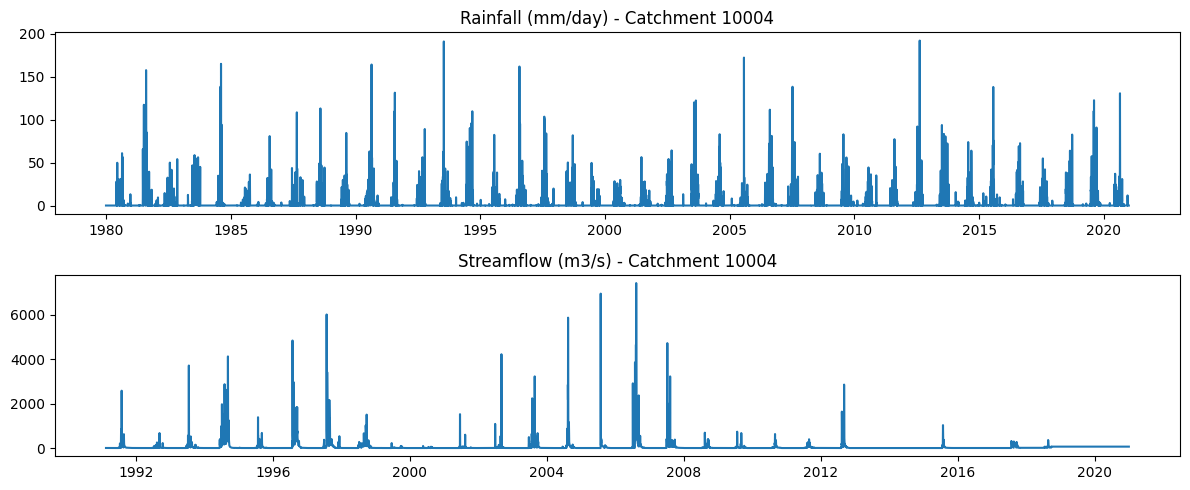

In [21]:
# Step 5: Load and Visualize Data for First Catchment
cid = catchment_ids[0]
catchment_file = f'{data_dir}/catchment_mean_forcings/{cid}.csv'
met = pd.read_csv(catchment_file)
sf = pd.read_csv(streamflow_file)
met['date'] = pd.to_datetime(met[['year', 'month', 'day']])
sf['date'] = pd.to_datetime(sf[['year', 'month', 'day']])
df = pd.merge(met, sf[['date', cid]], on='date')
df.rename(columns={cid: 'streamflow'}, inplace=True)
df.fillna(method='ffill', inplace=True)

# Plot rainfall and streamflow
plt.figure(figsize=(12,5))
plt.subplot(2,1,1)
plt.plot(df['date'], df['prcp(mm/day)'])
plt.title(f'Rainfall (mm/day) - Catchment {cid}')
plt.subplot(2,1,2)
plt.plot(df['date'], df['streamflow'])
plt.title(f'Streamflow (m3/s) - Catchment {cid}')
plt.tight_layout()
plt.show()


Processing catchment 10004...


/tmp/ipython-input-27-2408129074.py:14: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


103/103 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Catchment 10004: RMSE=234.75, R2=-7.37


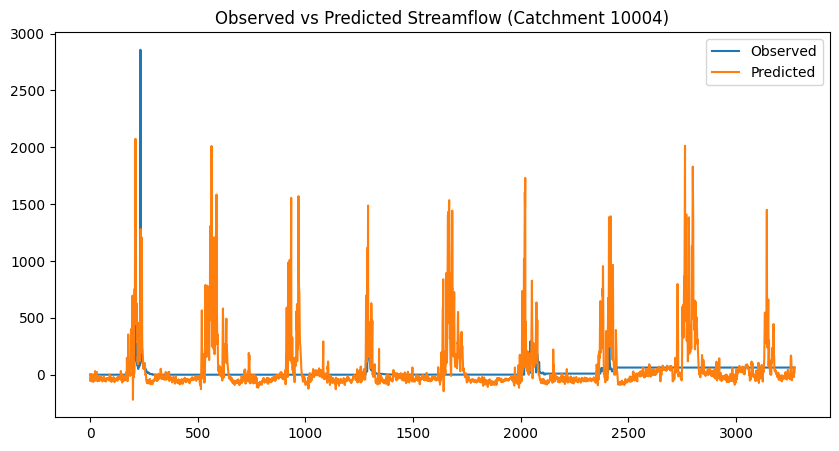

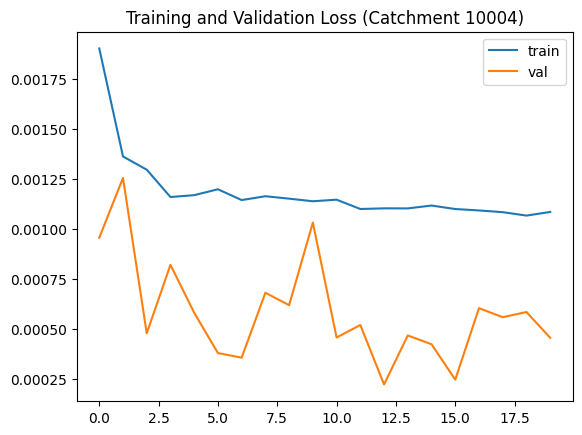


Processing catchment 10005...


/tmp/ipython-input-27-2408129074.py:14: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Catchment 10005: RMSE=42.52, R2=-0.14


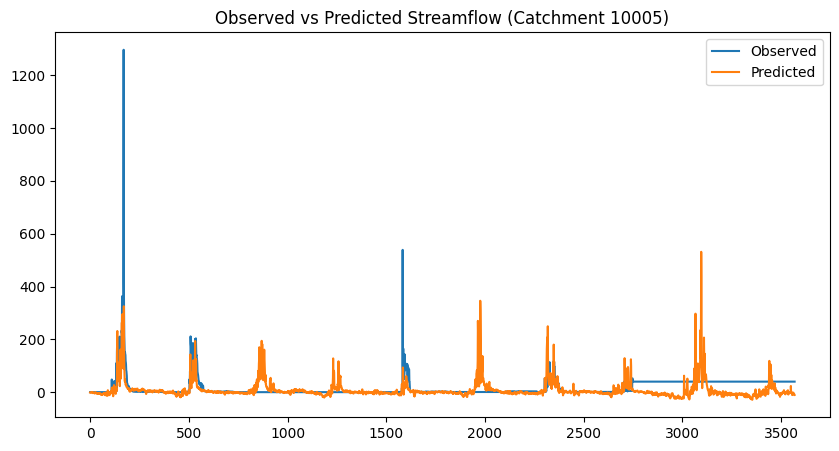

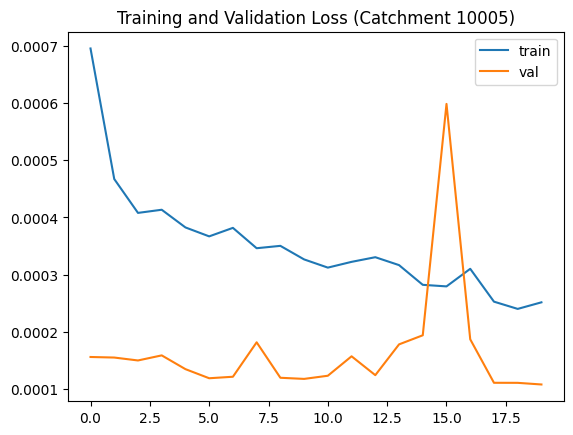


Processing catchment 10008...


/tmp/ipython-input-27-2408129074.py:14: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Catchment 10008: RMSE=509.31, R2=-0.09


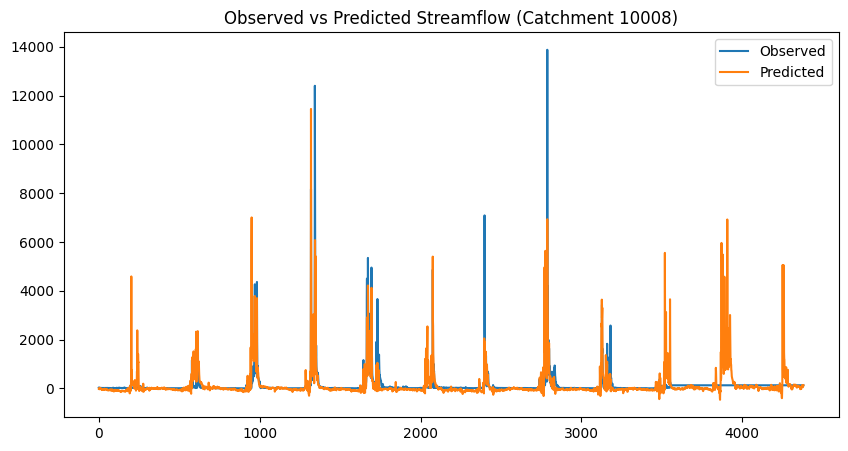

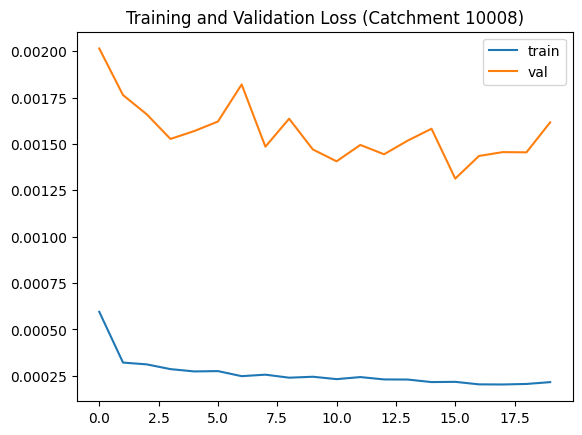


Processing catchment 10010...


/tmp/ipython-input-27-2408129074.py:14: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Catchment 10010: RMSE=212.43, R2=0.08


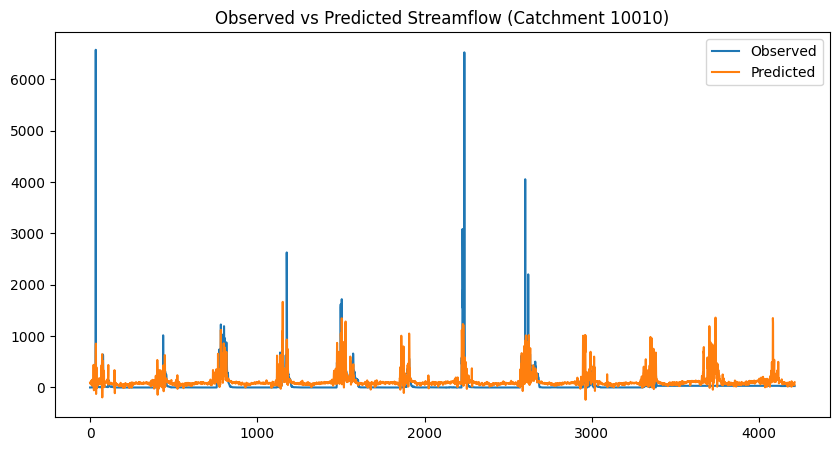

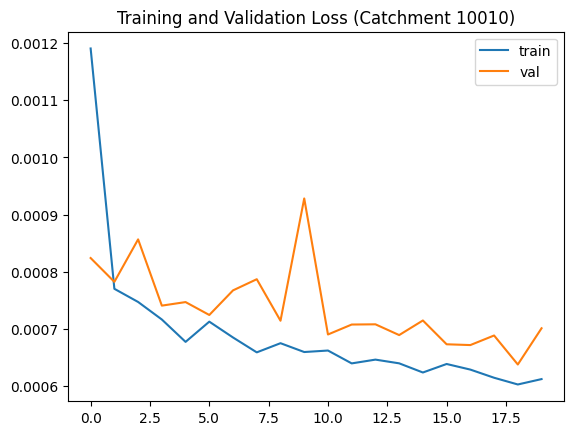


Processing catchment 10011...


/tmp/ipython-input-27-2408129074.py:14: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Catchment 10011: RMSE=242.95, R2=0.08


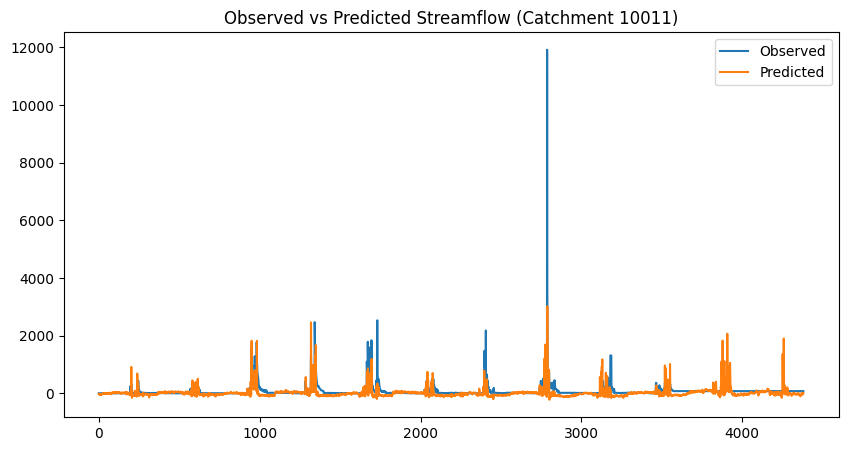

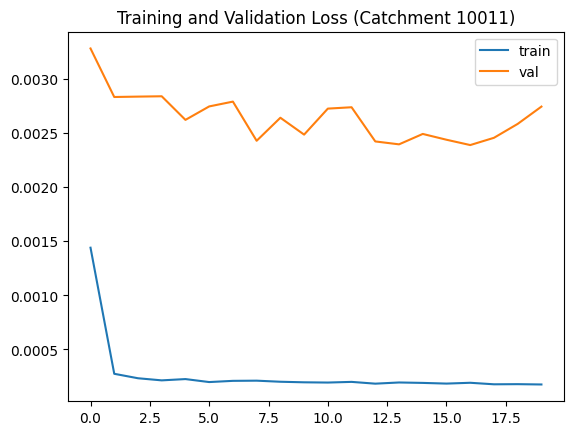


Processing catchment 10013...


/tmp/ipython-input-27-2408129074.py:14: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Catchment 10013: RMSE=44.79, R2=-0.63


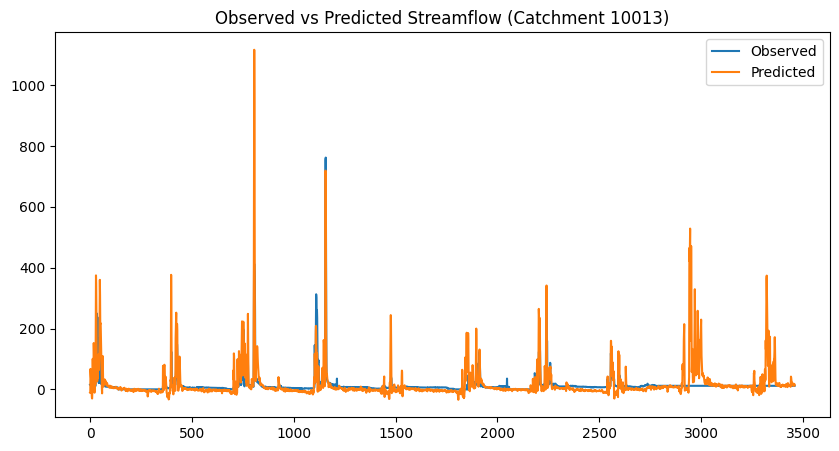

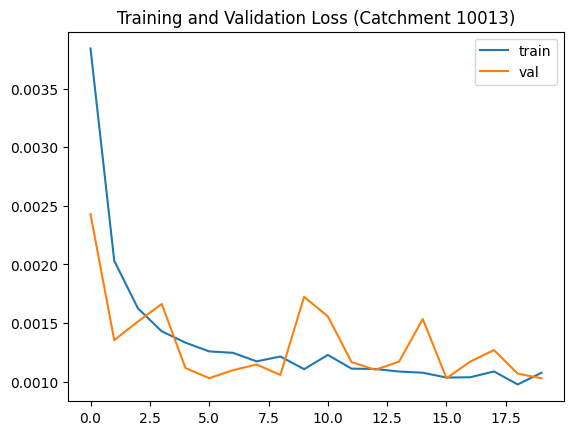


Processing catchment 10014...


/tmp/ipython-input-27-2408129074.py:14: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Catchment 10014: RMSE=66.83, R2=0.09


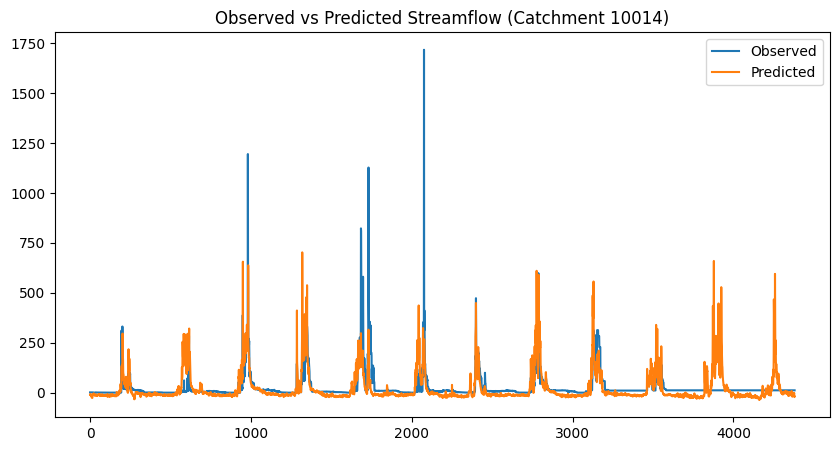

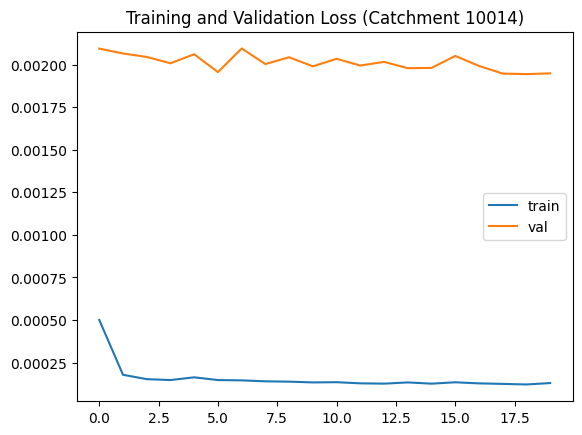

In [27]:
# Step 6: Train and Evaluate LSTM Model for Each Catchment
results = []

for cid in catchment_ids:
    print(f'\nProcessing catchment {cid}...')
    catchment_file = f'{data_dir}/catchment_mean_forcings/{cid}.csv'
    # Load meteorological and streamflow data
    met = pd.read_csv(catchment_file)
    sf = pd.read_csv(streamflow_file)
    met['date'] = pd.to_datetime(met[['year', 'month', 'day']])
    sf['date'] = pd.to_datetime(sf[['year', 'month', 'day']])
    df = pd.merge(met, sf[['date', cid]], on='date')
    df.rename(columns={cid: 'streamflow'}, inplace=True)
    df.fillna(method='ffill', inplace=True)
    df = df.dropna()

    # Scale features and target
    scaler_x = MinMaxScaler()
    scaler_y = MinMaxScaler()
    try:
        X_scaled = scaler_x.fit_transform(df[features])
    except KeyError as ke:
        print(f"Column missing in {cid}: {ke}")
        continue
    y_scaled = scaler_y.fit_transform(df[[target]])

    # Create sequences for LSTM
    X_seq, y_seq = create_sequences(X_scaled, y_scaled, time_steps=7)
    if len(X_seq) == 0:
        print(f"Not enough data for catchment {cid}. Skipping.")
        continue
    split = int(0.7 * len(X_seq))
    X_train, X_test = X_seq[:split], X_seq[split:]
    y_train, y_test = y_seq[:split], y_seq[split:]

    # Build and train LSTM model
    model = Sequential([
        LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]), activation='tanh'),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1, verbose=0)

    # Evaluate
    y_pred = model.predict(X_test)
    y_pred_inv = scaler_y.inverse_transform(y_pred)
    y_test_inv = scaler_y.inverse_transform(y_test)
    rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
    r2 = r2_score(y_test_inv, y_pred_inv)
    print(f'Catchment {cid}: RMSE={rmse:.2f}, R2={r2:.2f}')
    results.append({'catchment': cid, 'rmse': rmse, 'r2': r2})

    # Plot predicted vs observed
    plt.figure(figsize=(10,5))
    plt.plot(y_test_inv, label='Observed')
    plt.plot(y_pred_inv, label='Predicted')
    plt.legend()
    plt.title(f'Observed vs Predicted Streamflow (Catchment {cid})')
    plt.show()

    # Plot training loss
    plt.figure()
    plt.plot(history.history['loss'], label='train')
    plt.plot(history.history['val_loss'], label='val')
    plt.legend()
    plt.title(f'Training and Validation Loss (Catchment {cid})')
    plt.show()

In [28]:
# Step 7: Print Results Summary Table
print('\nSummary Table:')
print('| Catchment | RMSE   | R²    |')
print('|-----------|--------|-------|')
for res in results:
    print(f"| {res['catchment']} | {res['rmse']:.2f} | {res['r2']:.2f} |")


Summary Table:
| Catchment | RMSE   | R²    |
|-----------|--------|-------|
| 10004 | 234.75 | -7.37 |
| 10005 | 42.52 | -0.14 |
| 10008 | 509.31 | -0.09 |
| 10010 | 212.43 | 0.08 |
| 10011 | 242.95 | 0.08 |
| 10013 | 44.79 | -0.63 |
| 10014 | 66.83 | 0.09 |
